In [27]:
from utils import get_hf_dataset

%load_ext autoreload
%autoreload 2

dataset = get_hf_dataset()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Found cached dataset json (D:/hf_datasets/json/default-5075b1c63c2a9678/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset json (D:/hf_datasets/json/default-a8e9242f0c3ba640/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at D:\hf_datasets\json\default-5075b1c63c2a9678\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-a90b6bc6479aab82.arrow
Loading cached processed dataset at D:\hf_datasets\json\default-a8e9242f0c3ba640\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-10303babc9da22f0.arrow


In [28]:
# dataset['train'][0]["annotations"]

In [17]:
# def true_if_more_than_one_label(example):
#     for annotation in example['annotations']:
#         if len(annotation['value']['labels']) > 1:
#             return {"more_than2": True}
#     return {"more_than2": False}

In [18]:
# dataset_count_labels = dataset.map(true_if_more_than_one_label)

In [19]:
# dataset_couAnt_labels.filter(lambda example: example['more_than2'] == True)

In [29]:
from utils import parse_to_ner
dataset_ner = parse_to_ner(dataset) 

Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

In [8]:
#print(dataset_ner['train'][0]['tokens'], dataset_ner['train'][0]['ner_tags'], sep="\n")

In [9]:
# from utils import cast_ner_labels_to_int

# casted = cast_ner_labels_to_int(dataset_ner['train'])

In [10]:
# from baselines import TurboSimpleBaseline, SimpleBaselineEvalPipeline

# baseline1 = TurboSimpleBaseline()
# baseline1.fit(dataset_ner['train'])

In [11]:
# tokens = dataset_ner['test'][0]['tokens']
# prediction = [x['entity'] for x in baseline1.predict([" ".join(tokens)])[0]]
# target = dataset_ner['test'][0]['ner_tags']
# print("TOKEN", "PREDICTION", "TARGET", sep="\t")
# for token, pred, targ in zip(tokens, prediction, target):
#     print(token, pred, targ, sep="\t")

In [12]:
# from evaluate import evaluator
# from constants import TASK
# task_evaluator = evaluator(TASK)

In [13]:
# results = task_evaluator.compute(
#     model_or_pipeline=EvalPipeline(baseline1),
#     data=dataset_ner['test'],
#     metric="seqeval",
# )

In [14]:
# results

In [15]:
# from utils import create_fasttext_model

# create_fasttext_model(dataset_ner['train'], "legal_eval.bin")

In [47]:
from baselines import MLBaseline, EvalPipeline
import fasttext
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
MODEL_PATH = "embeddings/legal_eval.bin"
model = fasttext.load_model(MODEL_PATH)
ml_baseline = MLBaseline(model, XGBClassifier(), window_size=11)
X, y = ml_baseline.prepare_dataset(dataset_ner['train'])

Loading cached processed dataset at D:\hf_datasets\json\default-5075b1c63c2a9678\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-01bc7eaebcd4c8cd.arrow


Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

### Having this X calculate average cosine distances between entries? Maybe this would show something nice 

There were some problems with empty embeddings as we have tokens like "" in the text -> use strip() MOREOVER DONT USE split(" ") use just split()!!! Just use HF Tokenizer...

In [32]:
# import numpy as np

# for window_size in [1,3,7,11]:
#     ml_baseline = MLBaseline(model, XGBClassifier(), window_size=window_size)
#     X, y = ml_baseline.prepare_dataset(dataset_ner['train'])
#     #X, y = ml_baseline.downsample_other(X, y, n_o_selected = 10000)
#     normalized_X = X / np.sqrt(np.sum(X**2, axis=1, keepdims=True))
#     break

Casting the dataset:   0%|          | 0/10995 [00:00<?, ? examples/s]

Parameter 'fn_kwargs'={'embed_model': <fasttext.FastText._FastText object at 0x000001BA660AD6C0>, 'window_size': 1} of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

In [48]:
ml_baseline.fit(X, y, n_o_selected=10000)

In [42]:
tokens = dataset_ner['test'][0]['tokens']
prediction = [x['entity'] for x in ml_baseline.predict([" ".join(tokens)])[0]]
target = dataset_ner['test'][0]['ner_tags']
print("TOKEN", "PREDICTION", "TARGET", sep="\t")
for token, pred, targ in zip(tokens, prediction, target):
    print(token, pred, targ, sep="\t")

TOKEN	PREDICTION	TARGET
True,	O	O
our	O	O
Constitution	O	B-STATUTE
has	O	O
no	O	O
'due	O	O
process'	I-PROVISION	O
clause	I-PROVISION	O
or	O	O
the	O	O
VIII	O	O
Amendment;	O	O
but,	O	O
in	O	O
this	O	O
branch	O	O
of	O	O
law,	I-PRECEDENT	O
after	I-PRECEDENT	O
R.C.	I-PRECEDENT	B-PRECEDENT
Cooper	I-PRECEDENT	I-PRECEDENT
v.	I-PRECEDENT	I-PRECEDENT
Union	I-PRECEDENT	I-PRECEDENT
of	I-PRECEDENT	I-PRECEDENT
India,	I-PRECEDENT	I-PRECEDENT
(1970)	I-PRECEDENT	I-PRECEDENT
1	I-PRECEDENT	I-PRECEDENT
SCC	I-PRECEDENT	I-PRECEDENT
248	I-PRECEDENT	I-PRECEDENT
and	I-PRECEDENT	O
Maneka	I-PRECEDENT	B-PRECEDENT
Gandhi	I-PRECEDENT	I-PRECEDENT
v.	I-PRECEDENT	I-PRECEDENT
Union	I-PRECEDENT	I-PRECEDENT
of	I-PRECEDENT	I-PRECEDENT
India,	I-PRECEDENT	I-PRECEDENT
(1978)	I-PRECEDENT	I-PRECEDENT
1	I-PRECEDENT	I-PRECEDENT
SCC	O	I-PRECEDENT
248,	O	I-PRECEDENT
the	O	O
consequence	O	O
is	O	O
the	O	O
same.	O	O


In [45]:
from evaluate import evaluator
from constants import TASK
task_evaluator = evaluator(TASK)
results = task_evaluator.compute(
    model_or_pipeline=EvalPipeline(ml_baseline),
    data=dataset_ner['test'],
    metric="seqeval",
)

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

In [46]:
results

{'CASE_NUMBER': {'precision': 0.005277044854881266,
  'recall': 0.01680672268907563,
  'f1': 0.008032128514056224,
  'number': 119},
 'COURT': {'precision': 0.004163197335553705,
  'recall': 0.016891891891891893,
  'f1': 0.006680026720106881,
  'number': 296},
 'DATE': {'precision': 0.050872093023255814,
  'recall': 0.32558139534883723,
  'f1': 0.08799497171590197,
  'number': 215},
 'GPE': {'precision': 0.05017921146953405,
  'recall': 0.0915032679738562,
  'f1': 0.06481481481481483,
  'number': 153},
 'JUDGE': {'precision': 0.02631578947368421,
  'recall': 0.09411764705882353,
  'f1': 0.04113110539845758,
  'number': 170},
 'LAWYER': {'precision': 0.00794912559618442,
  'recall': 0.00992063492063492,
  'f1': 0.0088261253309797,
  'number': 504},
 'ORG': {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'number': 158},
 'OTHER_PERSON': {'precision': 0.028913963328631876,
  'recall': 0.155893536121673,
  'f1': 0.04878048780487805,
  'number': 263},
 'PETITIONER': {'precision': 0.01405152224

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from utils import cast_ner_labels_to_int

casted = cast_ner_labels_to_int(dataset_ner['train'])

Loading cached processed dataset at D:\hf_datasets\json\default-5075b1c63c2a9678\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-ad21ca1b2f5272a4.arrow


<BarContainer object of 29 artists>

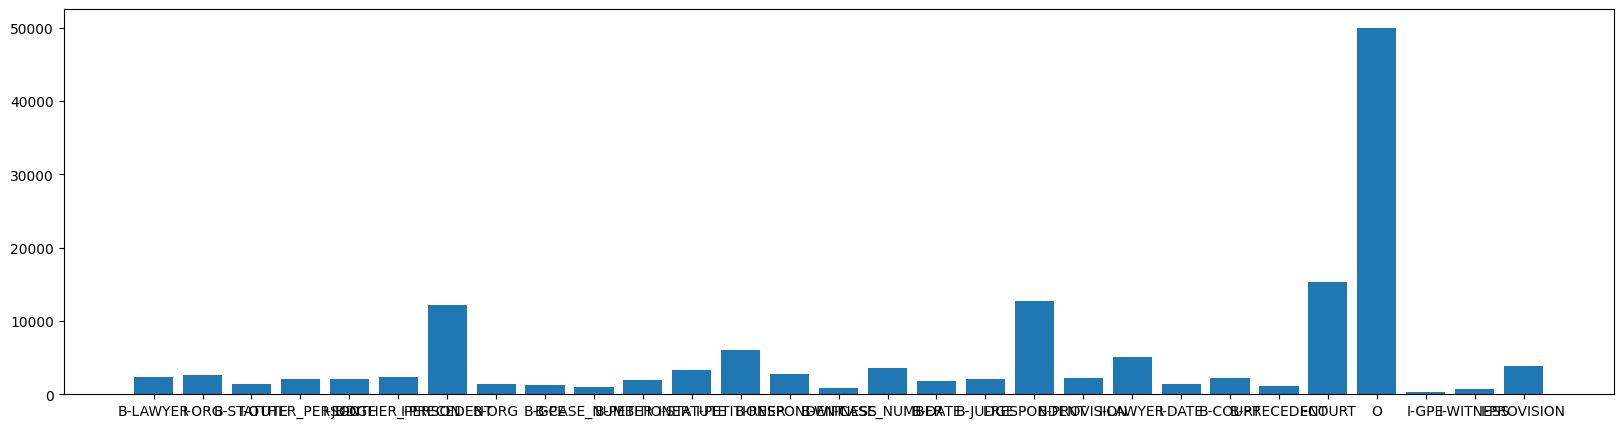

In [63]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

class_labels = casted.features['ner_tags'].feature
classes, counts = np.unique(y, return_counts=True)

plt.bar(class_labels.int2str(classes), counts)